# 🏡 House Price Prediction Project using Regression Models

## 📌 Project Objective
To predict the **Sale Price** of houses in Ames, Iowa using various regression models, including:
- Linear Regression (single & multiple features)
- Polynomial Regression
- Support Vector Regression (SVR)
- Decision Tree Regressor
- Random Forest Regressor

We'll perform an end-to-end Machine Learning workflow with:
1. Data Loading
2. Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Selection
5. Data Splitting & Scaling
6. Model Training
7. Model Evaluation & Comparison
8. Sample Prediction


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

2. Load Dataset

In [24]:
train_df = pd.read_csv(r"C:\Users\hi\Downloads\house price prediction\train.csv")

In [25]:
## 🧭 3. Initial Exploration

print("\n🔍 Shape of Dataset:", train_df.shape)
display(train_df.head())
train_df.info()
display(train_df.describe())



🔍 Shape of Dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
## 🧼 4. Data Cleaning
### 🧩 Handle Missing Values

missing_ratio = train_df.isnull().mean()
drop_cols = missing_ratio[missing_ratio > 0.4].index
train_df.drop(columns=drop_cols, inplace=True)

for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    else:
        train_df[col].fillna(train_df[col].median(), inplace=True)


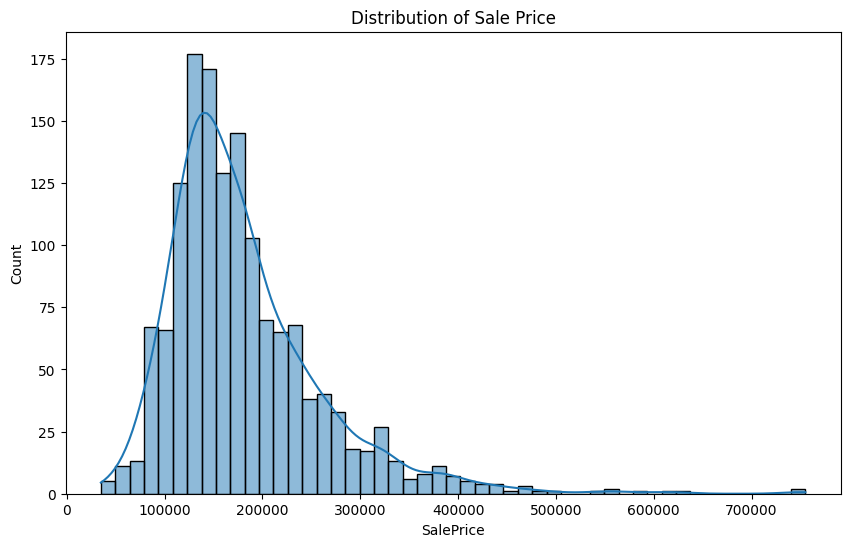

In [27]:
## 📊 5. Exploratory Data Analysis (EDA)
### 🎯 Target Variable Distribution

plt.figure(figsize=(10,6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()


📌 Top 10 Correlated Features with SalePrice:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


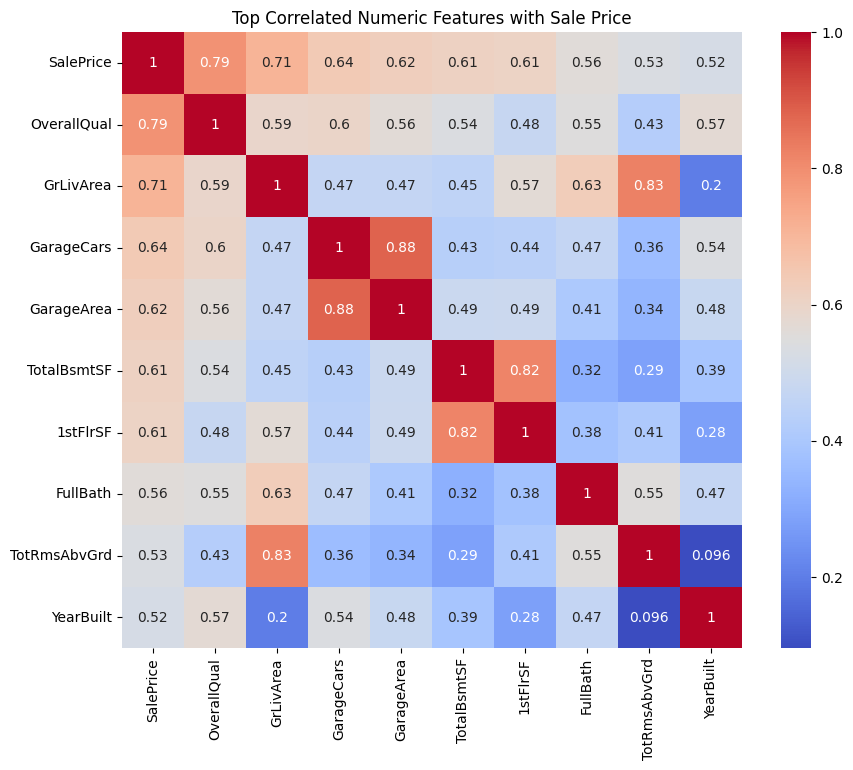

In [29]:
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])  # select only numeric features
corr = numeric_df.corr()['SalePrice'].sort_values(ascending=False)

print("\n📌 Top 10 Correlated Features with SalePrice:\n")
print(corr.head(10))

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df[corr.head(10).index].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Numeric Features with Sale Price')
plt.show()


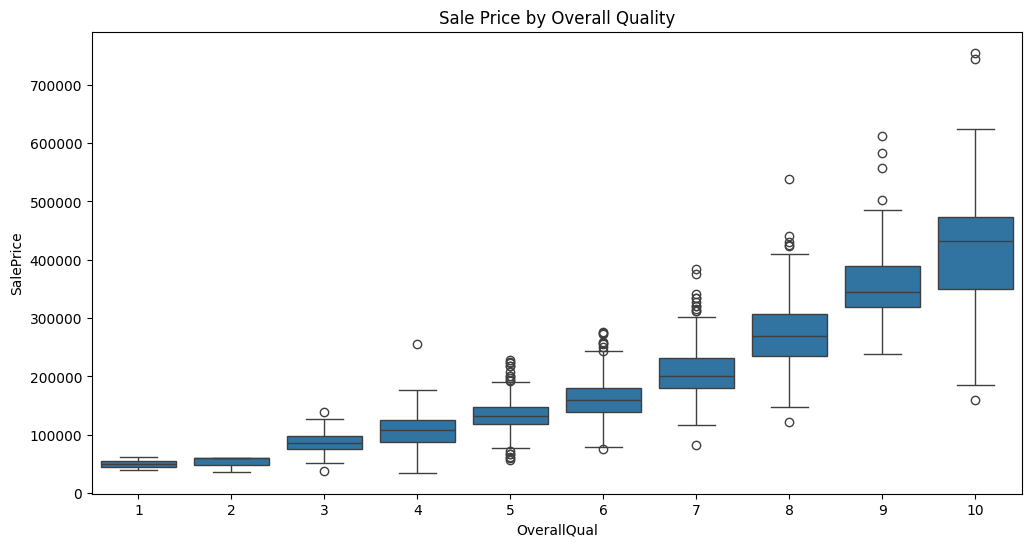

In [30]:
### 📦 Sale Price vs Overall Quality

plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Sale Price by Overall Quality')
plt.show()

In [31]:
## 🏗️ 6. Feature Selection
#We use top correlated numeric features:

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
            '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd']
X = train_df[features]
y = train_df['SalePrice']

In [32]:
##  7. Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
## ⚖️ 8. Feature Scaling (for SVR and polynomial regression)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
##9. Model Training & Evaluation

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

results = []

In [37]:
# 1. Linear Regression (1 Feature)
lr = LinearRegression()
lr.fit(X_train[['GrLivArea']], y_train)
pred_lr = lr.predict(X_test[['GrLivArea']])
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
r2_lr = r2_score(y_test, pred_lr) * 100
results.append(['Linear Regression (1 feature)', rmse_lr, r2_lr])
print(f"Linear Regression (1 feature): Accuracy = {r2_lr:.2f}%, RMSE = {rmse_lr:.2f}")

Linear Regression (1 feature): Accuracy = 55.43%, RMSE = 58471.76


In [38]:
# 2. Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
pred_mlr = mlr.predict(X_test)
rmse_mlr = np.sqrt(mean_squared_error(y_test, pred_mlr))
r2_mlr = r2_score(y_test, pred_mlr) * 100
results.append(['Multiple Linear Regression', rmse_mlr, r2_mlr])
print(f"Multiple Linear Regression: Accuracy = {r2_mlr:.2f}%, RMSE = {rmse_mlr:.2f}")

Multiple Linear Regression: Accuracy = 79.55%, RMSE = 39608.48


In [39]:
# 3. Polynomial Regression (1 Feature)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train[['GrLivArea']])
X_test_poly = poly.transform(X_test[['GrLivArea']])
pr = LinearRegression()
pr.fit(X_poly, y_train)
pred_pr = pr.predict(X_test_poly)
rmse_pr = np.sqrt(mean_squared_error(y_test, pred_pr))
r2_pr = r2_score(y_test, pred_pr) * 100
results.append(['Polynomial Regression (1 feature)', rmse_pr, r2_pr])
print(f"Polynomial Regression (1 feature): Accuracy = {r2_pr:.2f}%, RMSE = {rmse_pr:.2f}")

Polynomial Regression (1 feature): Accuracy = 53.32%, RMSE = 59836.22


In [40]:
# 4. Support Vector Regression
svr = SVR()
svr.fit(X_train_scaled, y_train)
pred_svr = svr.predict(X_test_scaled)
rmse_svr = np.sqrt(mean_squared_error(y_test, pred_svr))
r2_svr = r2_score(y_test, pred_svr) * 100
results.append(['Support Vector Regression', rmse_svr, r2_svr])
print(f"Support Vector Regression: Accuracy = {r2_svr:.2f}%, RMSE = {rmse_svr:.2f}")

Support Vector Regression: Accuracy = -2.31%, RMSE = 88587.67


In [41]:
# 5. Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, pred_dt))
r2_dt = r2_score(y_test, pred_dt) * 100
results.append(['Decision Tree', rmse_dt, r2_dt])
print(f"Decision Tree: Accuracy = {r2_dt:.2f}%, RMSE = {rmse_dt:.2f}")

Decision Tree: Accuracy = 78.46%, RMSE = 40646.56


In [42]:
# 6. Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf) * 100
results.append(['Random Forest', rmse_rf, r2_rf])
print(f"Random Forest: Accuracy = {r2_rf:.2f}%, RMSE = {rmse_rf:.2f}")

Random Forest: Accuracy = 89.15%, RMSE = 28851.59


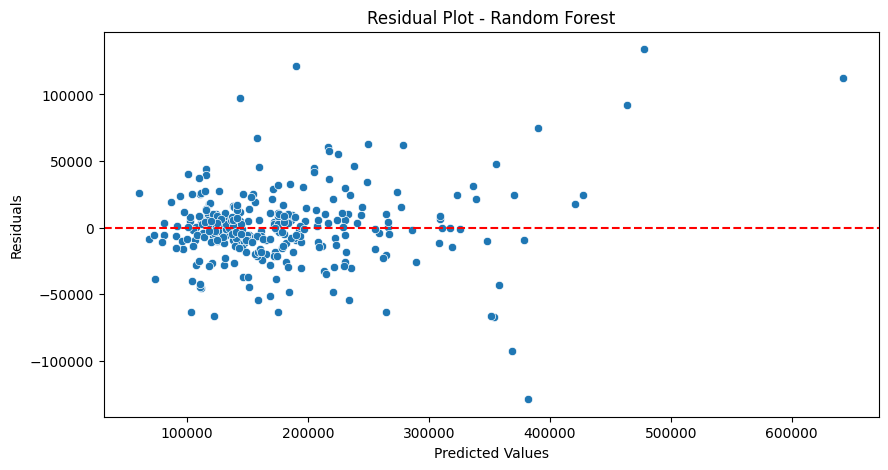

In [ ]:
###  Residual Plot (Random Forest)

residuals = y_test - pred_rf
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pred_rf, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residual Plot - Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


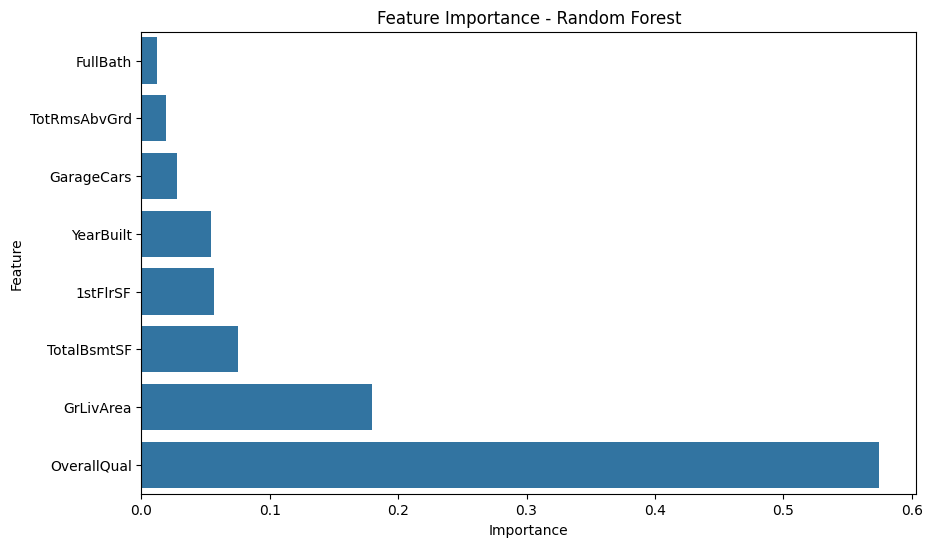

In [44]:
###  Feature Importance (Random Forest)

importances = rf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance - Random Forest')
plt.show()


,Model,RMSE,Accuracy (%)
6,Random Forest,28851.586811,89.147605
2,Multiple Linear Regression,39608.483601,79.546737
5,Decision Tree,40646.560422,78.460592
0,Linear Regression (1 feature),58471.756526,55.426325
1,Linear Regression (1 feature),58471.756526,55.426325
3,Polynomial Regression (1 feature),59836.218189,53.321764
4,Support Vector Regression,88587.666582,-2.313441


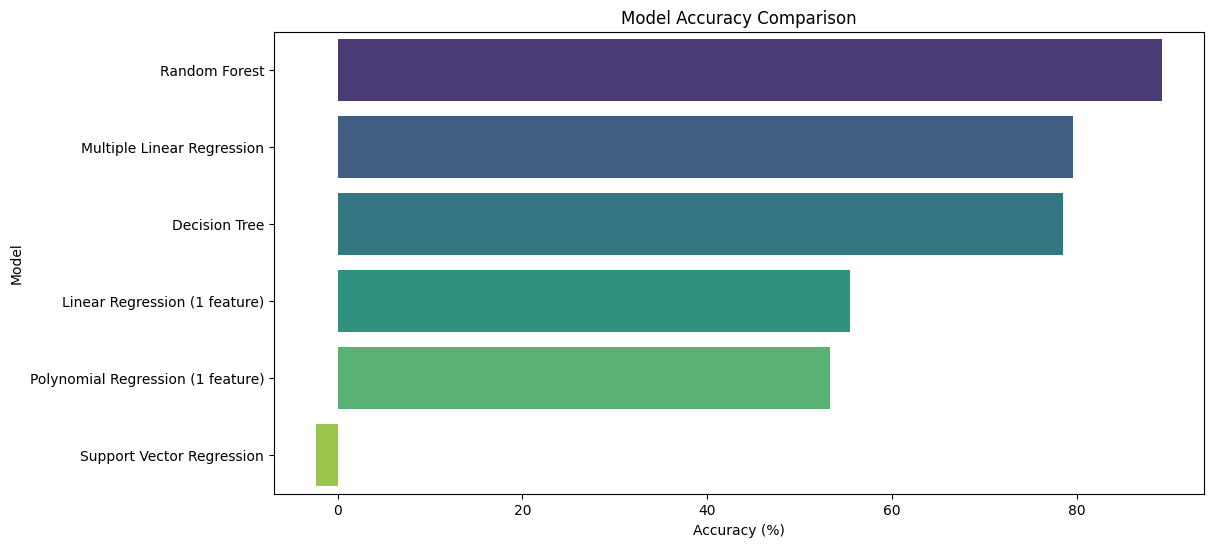

In [45]:
## 📊 10. Model Comparison

result_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'Accuracy (%)'])
result_df.sort_values(by='RMSE', inplace=True)
display(result_df)

plt.figure(figsize=(12,6))
sns.barplot(x='Accuracy (%)', y='Model', data=result_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.show()

In [46]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']